# Exercise 4.9

## Libraries and Pathways

In [1]:
# Import libraries# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
# File pathway shortcut
path = r'C:\Users\Chase\anaconda_projects\Exercise 4\07-2025 Instacart Basket Analysis'

In [3]:
# Prepared file - Orders_Products_Merge (Clean)
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge.pkl'))

## Bar Charts

<Axes: xlabel='orders_day_of_week'>

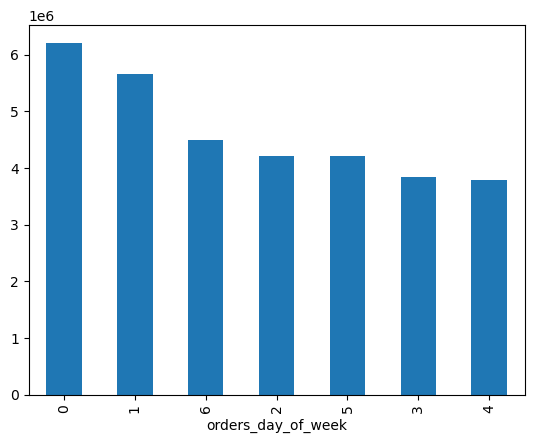

In [4]:
# Code to build a bar chart. # largest to smallest
df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

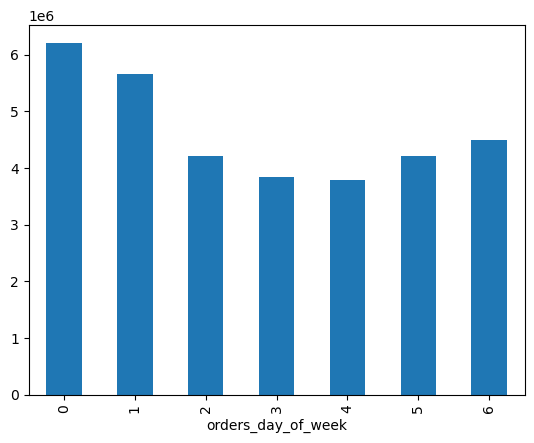

In [5]:
# Bar chart- adding sort_index() will sort the bars according to index order (not largest to smallest)
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

Same trick can be used when printing frequencies

In [6]:
# largest to smallest
df_ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6209808
1    5665951
6    4500391
2    4217868
5    4209603
3    3844175
4    3787263
Name: count, dtype: int64

In [7]:
# index order
df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6209808
1    5665951
2    4217868
3    3844175
4    3787263
5    4209603
6    4500391
Name: count, dtype: int64

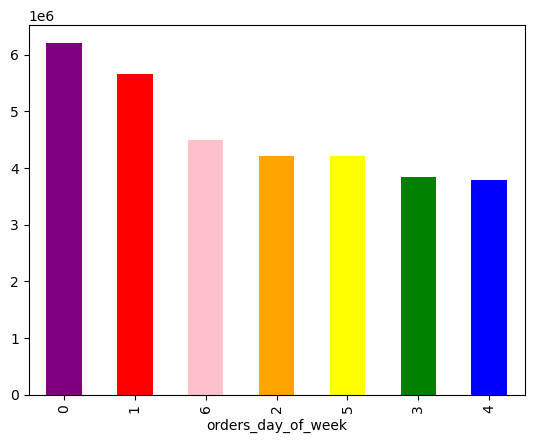

In [8]:
# adding color, updating bar command so the chart saves
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

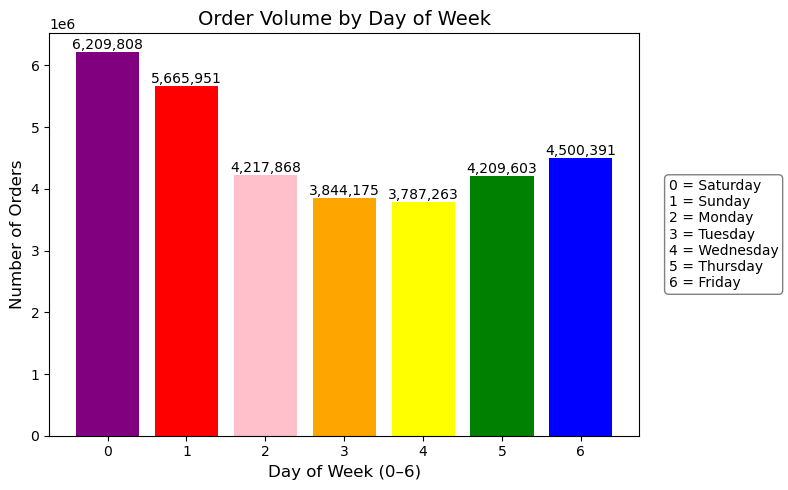

In [5]:
# Mapping of day numbers to names
day_labels = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

# Get order counts sorted by day index
order_counts = df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

# Create bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(order_counts.index, order_counts.values,
              color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5000,
            f'{height:,}', ha='center', va='bottom', fontsize=10)

# Axis labels and title
ax.set_title('Order Volume by Day of Week', fontsize=14)
ax.set_xlabel('Day of Week (0–6)', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)

# Create legend manually
legend_labels = [f"{num} = {name}" for num, name in day_labels.items()]
legend_text = "\n".join(legend_labels)
props = dict(boxstyle='round', facecolor='white', edgecolor='gray')
ax.text(1.05, 0.5, legend_text, transform=ax.transAxes,
        fontsize=10, verticalalignment='center', bbox=props)

# Final layout and save
plt.tight_layout()
plt.savefig('order_volume_by_day_with_legend.png', dpi=300)
plt.show()

In [6]:
# export new order volume by day of week chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [9]:
# Export the image outside of Juptyer in the form of an image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Histograms and Scatterplots

#### Histogram

<Axes: ylabel='Frequency'>

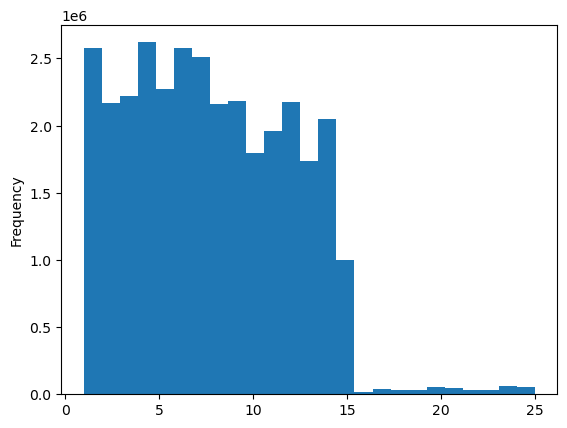

In [10]:
# Create histogram for PRICES
df_ords_prods_merge['prices'].plot.hist(bins = 25)

In [11]:
# the reading assignment is showing why if the chart above had only one column to check values to look for outliers.
# I already took care of the outliers
df_ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     7.790889e+00
std      4.241494e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

#### Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

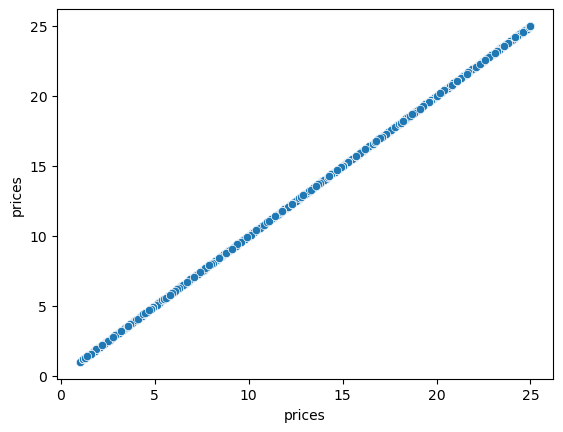

In [12]:
# Scatter plots are great for investigating the relationship between two variables but can be used to visualize the outliers as well
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

In [13]:
# Check data for max prices, I took care of outliers already
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_name,aisle_id,department_id,prices,_merge,price_range,busiest_day,busiest_period_of_day


In [14]:
# turn the outlier to NaN, purposely left the df_ off the actual code so it can't run because it's not needed
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

NameError: name 'ords_prods_merge' is not defined

In [ ]:
# Work check for Max price
df_ords_prods_merge['prices'].max()

In [ ]:
# Create histogram for PRICES
df_ords_prods_merge['prices'].plot.hist(bins = 25)

In [ ]:
# Create histogram for PRICES, increase the bins makes it more detailed
df_ords_prods_merge['prices'].plot.hist(bins = 70)

In [ ]:
# Export the image outside of Juptyer in the form of an image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

## Line Chart

Can't really create a line chart for this project but this section is practice

In [4]:
# Subset 2M rows to practice with
df = df_ords_prods_merge[:2000000]

#### Sampling Data

In [5]:
# creating a list holding True/False values to the test np.random.rant() <=0.7 (70/30 ratio)
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [6]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [7]:
np.random.rand(10)

array([0.79555729, 0.6652899 , 0.04000166, 0.90958442, 0.0493868 ,
       0.6829014 , 0.09612088, 0.92855965, 0.51356997, 0.69561069])

In [8]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_merge[dev]

In [9]:
# Store 30% of the sample in the dataframe small
small = df_ords_prods_merge[~dev]

In [10]:
# Work check, total count of rows
len(df_ords_prods_merge)

32435059

In [11]:
# add the big and small together to ensure they equal the total
len(big) + len(small)

32435059

In [12]:
# Making the chart smaller by selecting only the needed columns
df_2 = small[['orders_day_of_week','prices']]

KeyError: "['prices'] not in index"

This creates a new dataframe, df_2, that contains only the “prices” and “orders_day_of_week” columns from your small subset.

In [ ]:
# create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

### Export

# Pickle Export
df_ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'clean_merge_busiest_day.pkl'))